# Proyección  COVID Colombia

In [3]:
##
## Preparación
##
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

## Lectura de datos

In [9]:
datos= pd.read_csv('https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD&bom=true&format=true')
datos.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380.0,Otro,NaN
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724.0,Otro,NaN
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724.0,Otro,NaN
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,2020-03-08T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN


## Casos por día

In [24]:
datos['Fecha'] = pd.to_datetime(datos['Fecha diagnostico'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [25]:
fechas = [datos['Fecha'].min(),datos['Fecha'].max()]

FileNotFoundError: ignored

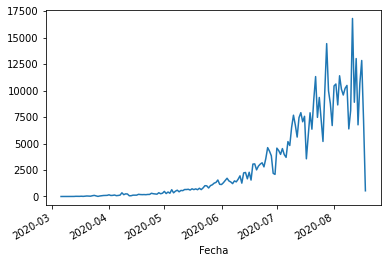

In [15]:
datos.groupby(['Fecha']).count()['ID de caso'].plot();
plt.savefig('docs/numbyyear.png')

## Generación de la página web

Para genera la página web, se usa el módulo `jinja2`, usando el archivo `templates/index.html` como plantilla.

In [ ]:
!cat templates/index.html

<!DOCTYPE html>
<html>
<head>
   <title>Ejemplo de un Dashboard</title>
</head>
<body>

    <h1>Analisis de las publicaciones de la revista Dyna-Colombia</h1>

    <p>Esta es una demostaacion de la creacion de un Dashboard estatico en GitHub Pages</p>

    <h2>Cantidad de articulos publicados por ano</h2>
  
    <img src="numbyyear.png">
    

    <h2>Articulos mas citados</h2>

    <ul>
        {% for i in articles %}
        <li> {{ i }} </li>
        {% endfor %}
    </ul>



</body>
</html>

En la plantilla, el código:


     <ul>
         {% for i in articles %}
         <li> {{ i }} </li>
         {% endfor %}
     </ul>
    
genera una lista de viñetas mediante un ciclo `for` donde cada elemento es uno de los 10 artículos más citados. La generación de la página (`docs/index.html`) se genera con el siguiente código 

In [ ]:
from jinja2 import Template

##
## Carga el template almacenado como una cadena de texto
##
template = Template(open('templates/index.html', 'rt').read())

##
## Genera el archivo index.html pasando en la variable articles 
## de la plantilla, el conteido de la variable most_cited
##
open("docs/index.html","w").write( template.render(articles = most_cited))

3223

## Publicación de la página web

Al actualizar el repo en GitHub se actualiza el sitio web automáticamente.

---